In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None )
pd.set_option('display.max_columns', None )
#pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [29]:
data_Final = pd.read_csv('data_Final.csv')
data_Final.head()

,OSEBuildingID,ENERGYSTARScore_mean,SiteEnergyUseWN(kBtu)_mean,GHGEmissions(MetricTonsCO2e)_mean,Neighborhood_2015,age,NumberofFloors_mean,PrimaryPropertyType_2015,LargestPropertyUseTypeGFA_mean,PropertyGFAParking_mean,util_steam,util_elec,util_gaz
0,1,62.5,7277224.50,249.705,DOWNTOWN,88,12.0,Hotel,88434.0,0.0,0.153106,0.326086,0.520808
1,2,56.0,8715133.50,279.685,DOWNTOWN,19,11.0,Hotel,83880.0,15064.0,0.153106,0.326086,0.520808
2,3,30.5,74721692.00,2075.380,DOWNTOWN,46,41.0,Hotel,756868.0,98359.0,0.153106,0.326086,0.520808
3,5,28.5,17655122.25,1111.385,DOWNTOWN,89,10.0,Hotel,61320.0,0.0,0.153106,0.326086,0.520808
4,8,71.0,14867373.00,506.355,DOWNTOWN,35,18.0,Hotel,123445.0,37230.0,0.153106,0.326086,0.520808


In [30]:
# on supprime les EnergyStarScore manquant
print(data_Final.shape)
data_Final.dropna(inplace = True)
print(data_Final.shape)

(1630, 13)
(1116, 13)


## preprocessing avec normalisation

In [31]:
colonne_X = [ 'Neighborhood_2015', 'age', 'LargestPropertyUseTypeGFA_mean',\
             'PropertyGFAParking_mean', 'NumberofFloors_mean','PrimaryPropertyType_2015',\
            'util_elec','util_gaz','util_steam']
data_X = data_Final[colonne_X]


In [32]:
data_X.head()

,Neighborhood_2015,age,LargestPropertyUseTypeGFA_mean,PropertyGFAParking_mean,NumberofFloors_mean,PrimaryPropertyType_2015,util_elec,util_gaz,util_steam
0,DOWNTOWN,88,88434.0,0.0,12.0,Hotel,0.326086,0.520808,0.153106
1,DOWNTOWN,19,83880.0,15064.0,11.0,Hotel,0.326086,0.520808,0.153106
2,DOWNTOWN,46,756868.0,98359.0,41.0,Hotel,0.326086,0.520808,0.153106
3,DOWNTOWN,89,61320.0,0.0,10.0,Hotel,0.326086,0.520808,0.153106
4,DOWNTOWN,35,123445.0,37230.0,18.0,Hotel,0.326086,0.520808,0.153106


In [33]:
def encodage(df):
    df = pd.get_dummies(df,columns=['Neighborhood_2015','PrimaryPropertyType_2015'])
    return df


In [34]:
def imputation(df):
    return df.dropna(axis=0)

In [35]:
def preprocessing(df):

    df['Log_NumberofFloors_mean']= np.log(df['NumberofFloors_mean']+1)
    df.drop(columns='NumberofFloors_mean', inplace=True)

    df['Log_LargestPropertyUseTypeGFA']= np.log(df['LargestPropertyUseTypeGFA_mean']+1)
    df.drop(columns='LargestPropertyUseTypeGFA_mean', inplace=True)

    df['Log_PropertyGFAParking_mean']= np.log(df['PropertyGFAParking_mean']+1)
    df.drop(columns='PropertyGFAParking_mean', inplace=True)
    
    return df

In [36]:
print(data_X.shape)
data_X = encodage(data_X)
data_X = imputation(data_X)
data_X = preprocessing(data_X)
print(data_X.shape)
    

(1116, 9)
(1116, 39)


In [37]:
data_y = pd.DataFrame(np.log1p(data_Final['SiteEnergyUseWN(kBtu)_mean']))

# imputation consommation energie pour test regression EnergyScore

In [38]:
from xgboost import XGBRegressor

xgbr = XGBRegressor(subsample = 0.7, reg_lambda = 1.1, gamma = 0.5, \
                    n_estimators = 150, max_depth = 4, min_child_weight = 3,\
                    learning_rate = 0.1,  colsample_bytree = 0.8)

xgbr.fit(data_X, data_y)

data_X['Consommation_predit'] = xgbr.predict(data_X)

In [39]:
data_X.head()

,age,util_elec,util_gaz,util_steam,Neighborhood_2015_BALLARD,Neighborhood_2015_CENTRAL,Neighborhood_2015_DELRIDGE,Neighborhood_2015_DOWNTOWN,Neighborhood_2015_EAST,Neighborhood_2015_GREATER DUWAMISH,Neighborhood_2015_LAKE UNION,Neighborhood_2015_MAGNOLIA / QUEEN ANNE,Neighborhood_2015_NORTH,Neighborhood_2015_NORTHEAST,Neighborhood_2015_NORTHWEST,Neighborhood_2015_SOUTHEAST,Neighborhood_2015_SOUTHWEST,PrimaryPropertyType_2015_Distribution Center,PrimaryPropertyType_2015_Distribution Center\n,PrimaryPropertyType_2015_Hospital,PrimaryPropertyType_2015_Hotel,PrimaryPropertyType_2015_K-12 School,PrimaryPropertyType_2015_Large Office,PrimaryPropertyType_2015_Medical Office,PrimaryPropertyType_2015_Mixed Use Property,PrimaryPropertyType_2015_Non-Refrigerated Warehouse,PrimaryPropertyType_2015_Other,PrimaryPropertyType_2015_Refrigerated Warehouse,PrimaryPropertyType_2015_Residence Hall/Dormitory,PrimaryPropertyType_2015_Retail Store,PrimaryPropertyType_2015_SPS-District K-12,PrimaryPropertyType_2015_Self-Storage Facility\n,PrimaryPropertyType_2015_Senior Care Community,PrimaryPropertyType_2015_Small- and Mid-Sized Office,PrimaryPropertyType_2015_Supermarket/Grocery Store,PrimaryPropertyType_2015_Worship Facility,Log_NumberofFloors_mean,Log_LargestPropertyUseTypeGFA,Log_PropertyGFAParking_mean,Consommation_predit
0,88,0.326086,0.520808,0.153106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.564949,11.390023,0.000000,15.971027
1,19,0.326086,0.520808,0.153106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.484907,11.337154,9.620129,15.864732
2,46,0.326086,0.520808,0.153106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3.737670,13.536945,11.496389,18.109060
3,89,0.326086,0.520808,0.153106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.397895,11.023878,0.000000,15.896291
4,35,0.326086,0.520808,0.153106,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.944439,11.723559,10.524897,16.353548


In [40]:
data_X['ENERGYSTARScore_mean'] = data_Final['ENERGYSTARScore_mean'] 
data_X['sq_ENERGYSTARScore_mean'] = data_Final['ENERGYSTARScore_mean'] * data_Final['ENERGYSTARScore_mean']


# regression emission gaz effet serre

In [42]:
data_y = pd.DataFrame(np.log1p(data_Final['GHGEmissions(MetricTonsCO2e)_mean']))

In [43]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.15)

print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train_noEnergyscore = X_train.drop(['ENERGYSTARScore_mean','sq_ENERGYSTARScore_mean'], axis=1)
X_test_noEnergyscore = X_test.drop(['ENERGYSTARScore_mean','sq_ENERGYSTARScore_mean'], axis=1)

X_train_noPredConso = X_train.drop(['Consommation_predit'], axis=1)
X_test_noPredConso = X_test.drop(['Consommation_predit'], axis=1)

X_train_noAll = X_train_noEnergyscore.drop(['Consommation_predit'], axis=1)
X_test_noAll = X_test_noEnergyscore.drop(['Consommation_predit'], axis=1)


X_train (948, 42)
y_train (948, 1)
X_test (168, 42)
y_test (168, 1)


## premiere regression

In [44]:
def evaluation( model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    
    rsq_test = model.score(X_test, y_test)

    #prédire sur le jeu de test
    y_test_pred = model.predict(X_test)

    # calculer la RMSE sur le jeu de test
    from sklearn import metrics
#RMSLE (Root Mean Squared Log Error)
    rmsle = np.sqrt(metrics.mean_squared_error(y_test, y_test_pred))
#    print("RMSE : {:.4f}".format(rmse))
        
    return [rsq_test,rmsle]

# LinearRegression

In [45]:
from sklearn.linear_model import LinearRegression

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(LinearRegression(), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(LinearRegression(), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(LinearRegression(), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(LinearRegression(), X_train_noAll, X_test_noAll, y_train, y_test))
        
    


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7734170903374564, 0.652292449414033]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7587091229285239, 0.6731304356675637]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7121367894007008, 0.735227696910486]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6305002147062639, 0.8329824891821426]


# dummy Regression

In [47]:
from sklearn.dummy import DummyRegressor

print("Consommation Energie R² RMSLE", evaluation(DummyRegressor(), X_train, X_test, y_train, y_test))
   

Consommation Energie R² RMSLE [-0.0010492840528948388, 1.3710601440680696]


# Ridge Regression

In [48]:
from sklearn.linear_model import Ridge

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=0.5), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=0.5), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=0.5), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=0.5), X_train_noAll, X_test_noAll, y_train, y_test))
        



regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7756739392216104, 0.6490357837045897]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7609155006246102, 0.6700457961803522]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7119232401214485, 0.7355003580757221]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.630119495037608, 0.8334115167233095]


### consommation energie

In [49]:
from sklearn.model_selection import GridSearchCV

params_grid = { 'alpha':np.logspace(-2,4,30)}
print( params_grid)
grid = GridSearchCV(Ridge(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))


{'alpha': array([1.00000000e-02, 1.61026203e-02, 2.59294380e-02, 4.17531894e-02,
       6.72335754e-02, 1.08263673e-01, 1.74332882e-01, 2.80721620e-01,
       4.52035366e-01, 7.27895384e-01, 1.17210230e+00, 1.88739182e+00,
       3.03919538e+00, 4.89390092e+00, 7.88046282e+00, 1.26896100e+01,
       2.04335972e+01, 3.29034456e+01, 5.29831691e+01, 8.53167852e+01,
       1.37382380e+02, 2.21221629e+02, 3.56224789e+02, 5.73615251e+02,
       9.23670857e+02, 1.48735211e+03, 2.39502662e+03, 3.85662042e+03,
       6.21016942e+03, 1.00000000e+04])}
0.710995640205418 {'alpha': 1.1721022975334805}
Consommation Energie R² RMSLE [0.7776134946702707, 0.6462238639851825]


In [51]:
params_grid = { 'alpha':np.linspace(1,4,21)}
print( params_grid)
grid = GridSearchCV(Ridge(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))


{'alpha': array([1.  , 1.15, 1.3 , 1.45, 1.6 , 1.75, 1.9 , 2.05, 2.2 , 2.35, 2.5 ,
       2.65, 2.8 , 2.95, 3.1 , 3.25, 3.4 , 3.55, 3.7 , 3.85, 4.  ])}
0.7110335642088657 {'alpha': 1.45}
Consommation Energie R² RMSLE [0.7781829961811911, 0.6453958879703671]


In [52]:
from sklearn.linear_model import Ridge

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=1.45), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=1.45), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=1.45), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Ridge(alpha=1.45), X_train_noAll, X_test_noAll, y_train, y_test))
        



regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7781829961811911, 0.6453958879703671]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7631167694336143, 0.6669540825166538]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7112614851868251, 0.7363446500530323]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6289928203934856, 0.8346798583235561]


# LASSO

In [53]:
from sklearn.linear_model import Lasso

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.5), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.5), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.5), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.5), X_train_noAll, X_test_noAll, y_train, y_test))
        
     


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.5930937965379537, 0.874129812205496]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.5466360595732576, 0.9226824578207782]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.33887845392318006, 1.1142161068152188]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.24097845778514415, 1.1938666694343398]


### consommation energie

In [54]:
params_grid = { 'alpha':np.logspace(-4,2,30)}
print( params_grid)
grid = GridSearchCV(Lasso(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))


{'alpha': array([1.00000000e-04, 1.61026203e-04, 2.59294380e-04, 4.17531894e-04,
       6.72335754e-04, 1.08263673e-03, 1.74332882e-03, 2.80721620e-03,
       4.52035366e-03, 7.27895384e-03, 1.17210230e-02, 1.88739182e-02,
       3.03919538e-02, 4.89390092e-02, 7.88046282e-02, 1.26896100e-01,
       2.04335972e-01, 3.29034456e-01, 5.29831691e-01, 8.53167852e-01,
       1.37382380e+00, 2.21221629e+00, 3.56224789e+00, 5.73615251e+00,
       9.23670857e+00, 1.48735211e+01, 2.39502662e+01, 3.85662042e+01,
       6.21016942e+01, 1.00000000e+02])}


C:\Users\paps\anaconda3\envs\openclass\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.702196869839895, tolerance: 0.1416765026653277
  model = cd_fast.enet_coordinate_descent(
C:\Users\paps\anaconda3\envs\openclass\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.68146573877317, tolerance: 0.14523671158888274
  model = cd_fast.enet_coordinate_descent(
C:\Users\paps\anaconda3\envs\openclass\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.7583717183537146, tolerance: 0.1416765026653277
  model = cd_fast.enet_coordinate_descent(
C:\Users\paps\anaconda3\envs\openclass\lib\site-packages\sklear

0.7122725640650754 {'alpha': 0.001082636733874054}
Consommation Energie R² RMSLE [0.7781578583803431, 0.6454324572445841]


In [55]:
params_grid = { 'alpha':np.linspace(0.0005,0.0025,21)}
print( params_grid)
grid = GridSearchCV(Lasso(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))


{'alpha': array([0.0005, 0.0006, 0.0007, 0.0008, 0.0009, 0.001 , 0.0011, 0.0012,
       0.0013, 0.0014, 0.0015, 0.0016, 0.0017, 0.0018, 0.0019, 0.002 ,
       0.0021, 0.0022, 0.0023, 0.0024, 0.0025])}
0.7123353402853958 {'alpha': 0.0013}
Consommation Energie R² RMSLE [0.7788083028601341, 0.6444855538385518]


In [56]:
from sklearn.linear_model import Lasso

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.0013), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.0013), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.0013), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(Lasso(alpha=0.0013), X_train_noAll, X_test_noAll, y_train, y_test))
        
     


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7788083028601341, 0.6444855538385518]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7629315441143807, 0.6672147861612576]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7119061547477438, 0.7355221684296132]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6301542917280991, 0.8333723140020407]


# DECISION TREE

In [57]:
from sklearn.tree import DecisionTreeRegressor

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(), X_train_noAll, X_test_noAll, y_train, y_test))
        
            


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.5622819664629272, 0.9066214634694112]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6064490702029317, 0.85966500516677]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.41850251643130343, 1.044967290687279]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.3698849782496464, 1.0877740479830809]


In [58]:
params_grid = { 'criterion': ['mse', 'friedman_mse', 'mae'],
              'max_depth' : np.linspace(1,7,7)}
print( params_grid)
grid = GridSearchCV(DecisionTreeRegressor(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train)
#print(grid.cv_results_)
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test, y_train, y_test))


{'criterion': ['mse', 'friedman_mse', 'mae'], 'max_depth': array([1., 2., 3., 4., 5., 6., 7.])}
0.6462134787473883 {'criterion': 'mse', 'max_depth': 4.0}
Consommation Energie R² RMSLE [0.7029053083550332, 0.7469236704373762]


In [59]:
from sklearn.tree import DecisionTreeRegressor

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(criterion = 'mse', max_depth = 4), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(criterion = 'mse', max_depth = 4), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(criterion = 'mse', max_depth = 4), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(DecisionTreeRegressor(criterion = 'mse', max_depth = 4), X_train_noAll, X_test_noAll, y_train, y_test))
        
            


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7068665361448433, 0.7419275134072437]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7029053083550331, 0.7469236704373763]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5558154492971235, 0.9132937828267703]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5820504823182897, 0.8859122171303307]


# kneighbors

In [60]:
from sklearn.neighbors import KNeighborsRegressor

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(KNeighborsRegressor(n_neighbors=5), X_train, X_test, y_train, y_test))
        
print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(KNeighborsRegressor(n_neighbors=5), X_train_noEnergyscore, X_test_noEnergyscore, y_train, y_test))
        
print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(KNeighborsRegressor(n_neighbors=5), X_train_noPredConso, X_test_noPredConso, y_train, y_test))
        
print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(KNeighborsRegressor(n_neighbors=5), X_train_noAll, X_test_noAll, y_train, y_test))
        



regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [-0.12513033096548143, 1.4535507276528032]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.36794292266922557, 1.089449053626122]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [-0.1263482398995961, 1.4543372203639042]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.14770281349869507, 1.2650983929517925]


# RandomForest

In [61]:
from sklearn.ensemble import RandomForestRegressor

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(RandomForestRegressor(), X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(RandomForestRegressor(), X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(RandomForestRegressor(), X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(RandomForestRegressor(), X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            
        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7755607739631781, 0.6491994718672603]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7504573769262483, 0.6845436474741605]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6961841236049212, 0.7553252604182386]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.611356663702145, 0.8542881642867612]


### consommation energie

In [62]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_noEnergyscore, y_train.values.ravel())

print(rf_random.best_params_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   30.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  3.4min finished


{'n_estimators': 400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70, 'bootstrap': True}


In [63]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor( n_estimators = 400, min_samples_split = 10, min_samples_leaf = 2, max_features = 'auto',\
                            max_depth = 70, bootstrap = True)

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            
        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7739695592588616, 0.6514967335217695]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7492843929904313, 0.6861506221047918]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7008397919708664, 0.7495156232698198]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6064842237092045, 0.8596266099912778]


In [64]:
from sklearn.model_selection import GridSearchCV
import timeit

start_time = timeit.default_timer()

# Create the parameter grid based on the results of random search 
params_grid = {
    'bootstrap': [True],
    'max_depth': [60, 70, 80 ],
    'max_features': ['auto'],
    'min_samples_leaf': [1,2, 3],
    'min_samples_split': [ 8, 10, 12],
    'n_estimators': [350, 400, 450]
}             
print( params_grid)
grid = GridSearchCV(RandomForestRegressor(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train.values.ravel())
#print(grid.cv_results_)

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))


{'bootstrap': [True], 'max_depth': [60, 70, 80], 'max_features': ['auto'], 'min_samples_leaf': [1, 2, 3], 'min_samples_split': [8, 10, 12], 'n_estimators': [350, 400, 450]}
resultat en 423.56s
0.6917471755940726 {'bootstrap': True, 'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 12, 'n_estimators': 450}
Consommation Energie R² RMSLE [0.7751060628590721, 0.6498567741760714]


In [65]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor( n_estimators = 450, min_samples_split = 12, min_samples_leaf = 2, max_features = 'auto',\
                            max_depth = 70, bootstrap = True)

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(rfr, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            
        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7767230358355357, 0.6475163454515614]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.747014413419613, 0.6892498273618557]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.7029089378296309, 0.7469191080051885]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6120790706514535, 0.8534938231760939]


# AdaBoost

In [66]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor()

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            

        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6893274111801371, 0.7638010390642955]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6654840211842084, 0.7925692350219523]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5605487244129493, 0.9084146748797912]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5312354060119402, 0.9382232210416248]


### consommation energie

In [67]:
from sklearn.model_selection import RandomizedSearchCV

# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'learning_rate': [0.01,0.05,0.1,0.3,1],
               'loss': ['linear', 'square', 'exponential']}
print(random_grid)

rf = AdaBoostRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_noEnergyscore, y_train.values.ravel())

print(rf_random.best_params_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   16.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.4min


{'n_estimators': 600, 'loss': 'linear', 'learning_rate': 1}


[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.4min finished


In [69]:
from sklearn.model_selection import GridSearchCV
import timeit

start_time = timeit.default_timer()

# Create the parameter grid based on the results of random search 
params_grid = {'n_estimators': [550, 600, 750],
               'learning_rate': [0.8, 1, 1.2, 2],
               'loss': ['linear']}

print( params_grid)
grid = GridSearchCV(AdaBoostRegressor(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train.values.ravel())

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))


{'n_estimators': [550, 600, 750], 'learning_rate': [0.8, 1, 1.2, 2], 'loss': ['linear']}
resultat en 10.91s
0.6519742040842967 {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 600}
Consommation Energie R² RMSLE [0.6840323916287842, 0.7702825476095292]


In [70]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor( learning_rate = 1, loss = 'linear', n_estimators = 600)

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            

        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6950631854993756, 0.7567173755332122]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6573445049114292, 0.8021537665586869]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5632280208671172, 0.9056411780857013]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5108436430030818, 0.9584128493070001]


# GradientBoost

In [71]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor()

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            

        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6860739767581698, 0.7677899726139733]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6646187799595706, 0.7935935817670912]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5785108050537027, 0.8896557695049125]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5548401484851155, 0.9142958975478813]


### consommation energie

In [72]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'learning_rate': [0.01,0.05,0.1,0.3,1],
               'criterion' : ['friedman_mse', 'mse', 'mae'],
               'max_depth' : [2, 3, 5, 10, 15],
               'min_samples_leaf' : [1, 2, 4, 6, 8] ,
               'min_samples_split' : [2, 4, 6, 10],
               'max_features' : ['auto', 'sqrt', 'log2', None],
               'loss': ['ls','lad','huber', 'quantile']}
print(random_grid)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = GradientBoostingRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_noEnergyscore, y_train.values.ravel())

print(rf_random.best_params_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'criterion': ['friedman_mse', 'mse', 'mae'], 'max_depth': [2, 3, 5, 10, 15], 'min_samples_leaf': [1, 2, 4, 6, 8], 'min_samples_split': [2, 4, 6, 10], 'max_features': ['auto', 'sqrt', 'log2', None], 'loss': ['ls', 'lad', 'huber', 'quantile']}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   35.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 13.7min finished


{'n_estimators': 1400, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 2, 'loss': 'huber', 'learning_rate': 0.01, 'criterion': 'friedman_mse'}


In [73]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor( n_estimators = 1400, min_samples_split = 10, min_samples_leaf = 2, criterion = 'friedman_mse', \
                                max_features = 'auto', max_depth = 2, loss = 'huber', learning_rate = 0.01)

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            

        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6845586909185537, 0.7696407601232192]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.664701683385452, 0.7934954908647961]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5668651217755662, 0.9018625538913281]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.48096318221873524, 0.9872516299317006]


# XGBOOST

In [74]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(xgbr, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(xgbr, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(xgbr, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(xgbr, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            





regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7510560439854684, 0.6837220246703547]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7361108834745922, 0.7039462767246117]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.6608364428354845, 0.7980560005925607]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5525555729113611, 0.9166389940807858]


In [76]:
# Create the random grid
random_grid = {'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'learning_rate': [0.01,0.05,0.1,0.3,1],
               'gamma': [0, 1, 10],
               'min_child_weight': [1, 3, 5],
               'max_depth' : [2, 5, 10],
               'colsample_bytree': [0.8, 0.9, 1.0],
                'subsample': [0.7, 0.8, 0.9, 1.0],
                'reg_lambda': [1.1, 1.2, 1.3]
              }
print(random_grid)

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = XGBRegressor(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_noEnergyscore, y_train.values.ravel())

print(rf_random.best_params_)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'gamma': [0, 1, 10], 'min_child_weight': [1, 3, 5], 'max_depth': [2, 5, 10], 'colsample_bytree': [0.8, 0.9, 1.0], 'subsample': [0.7, 0.8, 0.9, 1.0], 'reg_lambda': [1.1, 1.2, 1.3]}
Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  2.7min finished


{'subsample': 0.7, 'reg_lambda': 1.3, 'n_estimators': 200, 'min_child_weight': 1, 'max_depth': 5, 'learning_rate': 0.05, 'gamma': 1, 'colsample_bytree': 0.9}


In [77]:
from sklearn.model_selection import GridSearchCV
import timeit

start_time = timeit.default_timer()

# Create the parameter grid based on the results of random search 
params_grid = {'n_estimators': [ 150, 200, 250],
               'learning_rate': [0.03,0.05,0.07],
               'gamma': [0.8, 1, 1.2],
               'min_child_weight': [1, 2, 3],
               'max_depth' : [4, 5, 6],
               'colsample_bytree': [0.85, 0.9, 0.95],
                'subsample': [0.65, 0.7, 0.75],
                'reg_lambda': [1.2, 1.3, 1.4]
              }

print( params_grid)
grid = GridSearchCV(XGBRegressor(),params_grid, cv=5)
grid.fit(X_train_noEnergyscore, y_train.values.ravel())

elapsed = timeit.default_timer() - start_time
time = elapsed
print(f'resultat en {time:.2f}s')
print(grid.best_score_,grid.best_params_)
print("Consommation Energie R² RMSLE", evaluation(grid.best_estimator_, X_train, X_test,\
                                                  y_train.values.ravel(), y_test.values.ravel()))


{'n_estimators': [150, 200, 250], 'learning_rate': [0.03, 0.05, 0.07], 'gamma': [0.8, 1, 1.2], 'min_child_weight': [1, 2, 3], 'max_depth': [4, 5, 6], 'colsample_bytree': [0.85, 0.9, 0.95], 'subsample': [0.65, 0.7, 0.75], 'reg_lambda': [1.2, 1.3, 1.4]}
resultat en 5200.06s
0.691930206593781 {'colsample_bytree': 0.95, 'gamma': 1.2, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 3, 'n_estimators': 200, 'reg_lambda': 1.4, 'subsample': 0.65}
Consommation Energie R² RMSLE [0.7862745450197116, 0.6335149992389003]


In [78]:

xgbr = XGBRegressor(subsample = 0.65, reg_lambda = 1.4, gamma = 1.2, \
                    n_estimators = 200, max_depth = 5, min_child_weight = 3,\
                    learning_rate = 0.03,  colsample_bytree = 0.95)

print("\nregression avec EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train, X_test, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et avec prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noEnergyscore, X_test_noEnergyscore, \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression avec EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noPredConso, X_test_noPredConso,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))

print("\nregression sans EnergyStarScore et sans prediction consommation")
print("Emission gaz effet serre R² RMSLE", evaluation(ada, X_train_noAll, X_test_noAll,  \
                                                  y_train.values.ravel(), y_test.values.ravel()))            

        


regression avec EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.7085530656473578, 0.7397901122066375]

regression sans EnergyStarScore et avec prediction consommation
Emission gaz effet serre R² RMSLE [0.6846329133363454, 0.7695502076858707]

regression avec EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5777868783379588, 0.8904194536989268]

regression sans EnergyStarScore et sans prediction consommation
Emission gaz effet serre R² RMSLE [0.5099696619938299, 0.9592686705576932]


# comparaison modeles

## Consommation Energie

0.7734170903374564
0.7587091229285239
0.7121367894007008
0.6305002147062639


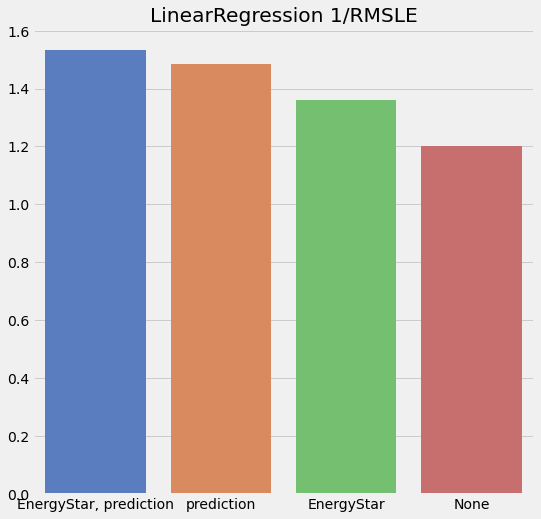

0.7781829961811911
0.7631167694336143
0.7112614851868251
0.6289928203934856


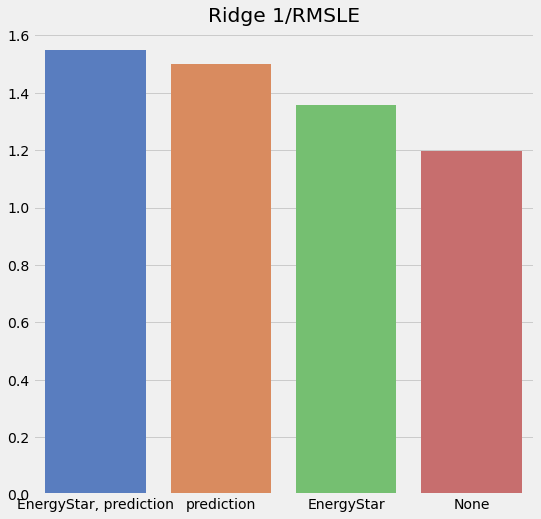

0.7788083028601341
0.7629315441143807
0.7119061547477438
0.6301542917280991


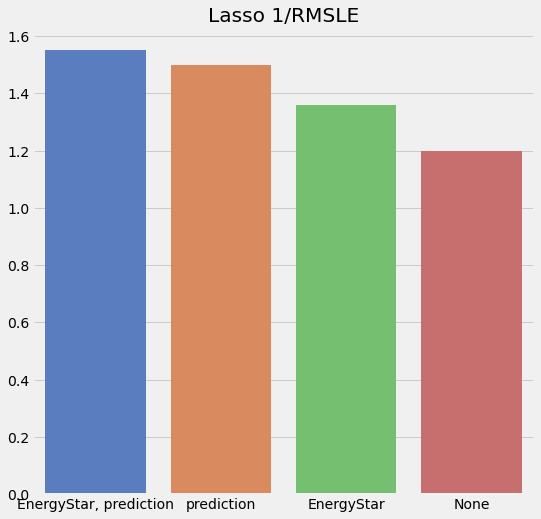

0.7765978579482924
0.7487026491751858
0.7019916722124844
0.6145236366621591


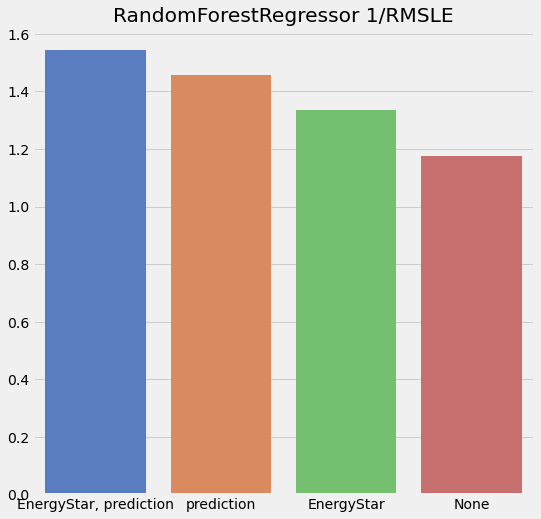

0.7862745450197116
0.7547017753613914
0.7028338078845928
0.6268149790838939


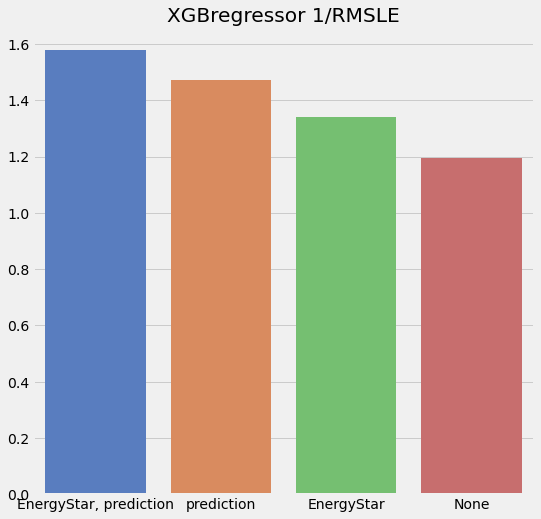

In [104]:
modeles = {
    'LinearRegression': LinearRegression(),
    'Ridge' : Ridge(alpha=1.45),
    'Lasso' : Lasso(alpha=0.0013),
    'RandomForestRegressor' : RandomForestRegressor( n_estimators = 450, min_samples_split = 12, min_samples_leaf = 2, max_features = 'auto',\
                            max_depth = 70, bootstrap = True),
    'XGBregressor' : XGBRegressor(subsample = 0.65, reg_lambda = 1.4, gamma = 1.2, \
                    n_estimators = 200, max_depth = 5, min_child_weight = 3,\
                    learning_rate = 0.03,  colsample_bytree = 0.95)
} 

for nom, model in modeles.items():
    res_train = evaluation(model, X_train, X_test, y_train.values.ravel(), y_test.values.ravel())
    res_train_noEnergyscore = evaluation(model, X_train_noEnergyscore, X_test_noEnergyscore, y_train.values.ravel(), y_test.values.ravel())
    res_train_noPredConso = evaluation(model, X_train_noPredConso, X_test_noPredConso, y_train.values.ravel(), y_test.values.ravel())
    res_train_noAll = evaluation(model, X_train_noAll, X_test_noAll, y_train.values.ravel(), y_test.values.ravel())
    print(res_train[0])
    print(res_train_noEnergyscore[0])
    print(res_train_noPredConso[0])
    print(res_train_noAll[0])
    plt.rcParams["figure.figsize"]=[8,8]
    plt.title(nom+" 1/RMSLE")
    tabl_grap_x=['EnergyStar, prediction', 'prediction', 'EnergyStar', 'None']
#    tabl_grap_y = [res_train[0],res_train_noEnergyscore[0],res_train_noPredConso[0],res_train_noAll[0]]
    tabl_grap_y = [1/res_train[1],1/res_train_noEnergyscore[1],1/res_train_noPredConso[1],1/res_train_noAll[1]]
    sns.barplot(x = tabl_grap_x,y = tabl_grap_y, palette="muted")
    plt.savefig('P4_02_04_feature_'+nom+'.jpg')
    plt.show()

In [82]:
modeles = {
    'LinearRegression': LinearRegression(),
    'DummyRegressor' : DummyRegressor(),
    'Ridge' : Ridge(alpha=1.45),
    'Lasso' : Lasso(alpha=0.0013),
    'DecisionTreeRegressor' : DecisionTreeRegressor(criterion = 'mse', max_depth = 4),
    'KNeighborsRegressor' : KNeighborsRegressor(n_neighbors=5),
    'RandomForestRegressor' : RandomForestRegressor( n_estimators = 450, min_samples_split = 12, min_samples_leaf = 2, max_features = 'auto',\
                            max_depth = 70, bootstrap = True),
    'AdaBoostRegressor' : AdaBoostRegressor( learning_rate = 1, loss = 'linear', n_estimators = 600),
    'GradientBoostingRegressor' : GradientBoostingRegressor( n_estimators = 1400, min_samples_split = 10, min_samples_leaf = 2, criterion = 'friedman_mse', \
                                max_features = 'auto', max_depth = 2, loss = 'huber', learning_rate = 0.01),
    'XGBregressor' : XGBRegressor(subsample = 0.65, reg_lambda = 1.4, gamma = 1.2, \
                    n_estimators = 200, max_depth = 5, min_child_weight = 3,\
                    learning_rate = 0.03,  colsample_bytree = 0.95)
} 

dico_res={}
for nom, model in modeles.items():
    start_time = timeit.default_timer()
    dico_res[nom] = evaluation(model, X_train_noEnergyscore, X_test_noEnergyscore, y_train.values.ravel(), y_test.values.ravel())
    elapsed = timeit.default_timer() - start_time
    time = elapsed
    print(f'resultat en {time:.2f}s pour {nom}')


list_sort = sorted(dico_res.items(), key=lambda item: item[1][1])


resultat en 0.01s pour LinearRegression
resultat en 0.00s pour DummyRegressor
resultat en 0.01s pour Ridge
resultat en 0.01s pour Lasso
resultat en 0.01s pour DecisionTreeRegressor
resultat en 0.01s pour KNeighborsRegressor
resultat en 1.37s pour RandomForestRegressor
resultat en 0.09s pour AdaBoostRegressor
resultat en 2.46s pour GradientBoostingRegressor
resultat en 0.17s pour XGBregressor


Ridge 0.7631167694336143 0.6669540825166538
Lasso 0.7629315441143807 0.6672147861612576
LinearRegression 0.7587091229285239 0.6731304356675637
GradientBoostingRegressor 0.7549572621049838 0.6783435420210854
XGBregressor 0.7547017753613914 0.6786970775594575
RandomForestRegressor 0.7476689313853049 0.6883576449953698
DecisionTreeRegressor 0.7029053083550332 0.7469236704373763
AdaBoostRegressor 0.6758956909112641 0.7801375448618746
KNeighborsRegressor 0.36794292266922557 1.089449053626122
DummyRegressor -0.0010492840528948388 1.3710601440680696


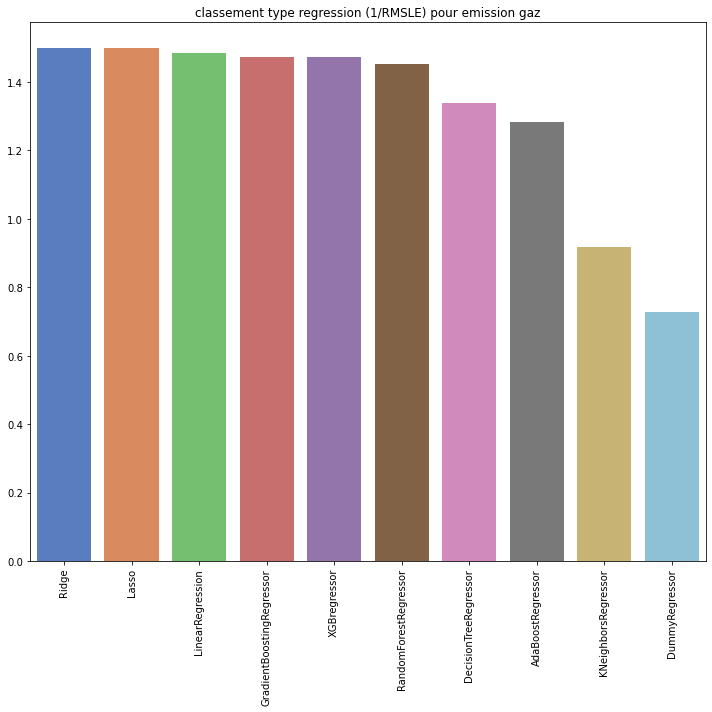

In [83]:
tabl_grap_x=[]
tabl_grap_y=[]
for li in list_sort:
    tabl_grap_x.append(li[0])
    tabl_grap_y.append(1/li[1][1])
    print(li[0],li[1][0],li[1][1])
plt.rcParams["figure.figsize"]=[10,10]
plt.title("classement type regression (1/RMSLE) pour emission gaz")
#plt.bar(tabl_grap_x,tabl_grap_y)
plt.xticks(rotation=90)
sns.barplot(x = tabl_grap_x,y = tabl_grap_y, palette="muted")
plt.tight_layout()
plt.savefig('P4_02_01_resultat_model_gaz.jpg')
plt.show()


## feature importance

In [88]:
xgbr = XGBRegressor(subsample = 0.65, reg_lambda = 1.4, gamma = 1.2, \
                    n_estimators = 200, max_depth = 5, min_child_weight = 3,\
                    learning_rate = 0.03,  colsample_bytree = 0.95)
xgbr.fit(X_train_noEnergyscore, y_train.values.ravel())
    

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.95, gamma=1.2, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=5,
             min_child_weight=3, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1.4, scale_pos_weight=1, subsample=0.65,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [89]:
xgbr.feature_importances_

array([0.02350686, 0.03115519, 0.04349023, 0.03777326, 0.02028763,
       0.0166721 , 0.01807235, 0.02783599, 0.02163727, 0.02060973,
       0.0182186 , 0.01727371, 0.01457986, 0.0237246 , 0.01759592,
       0.01869257, 0.02811206, 0.        , 0.01622307, 0.05761338,
       0.02449867, 0.02525407, 0.02064862, 0.02346915, 0.02743404,
       0.02346861, 0.01629783, 0.01271975, 0.01415665, 0.01840769,
       0.        , 0.        , 0.        , 0.04994844, 0.01559507,
       0.        , 0.02035789, 0.0246115 , 0.02313846, 0.1869192 ],
      dtype=float32)

Text(0.5, 122.5, 'Relative Importance')

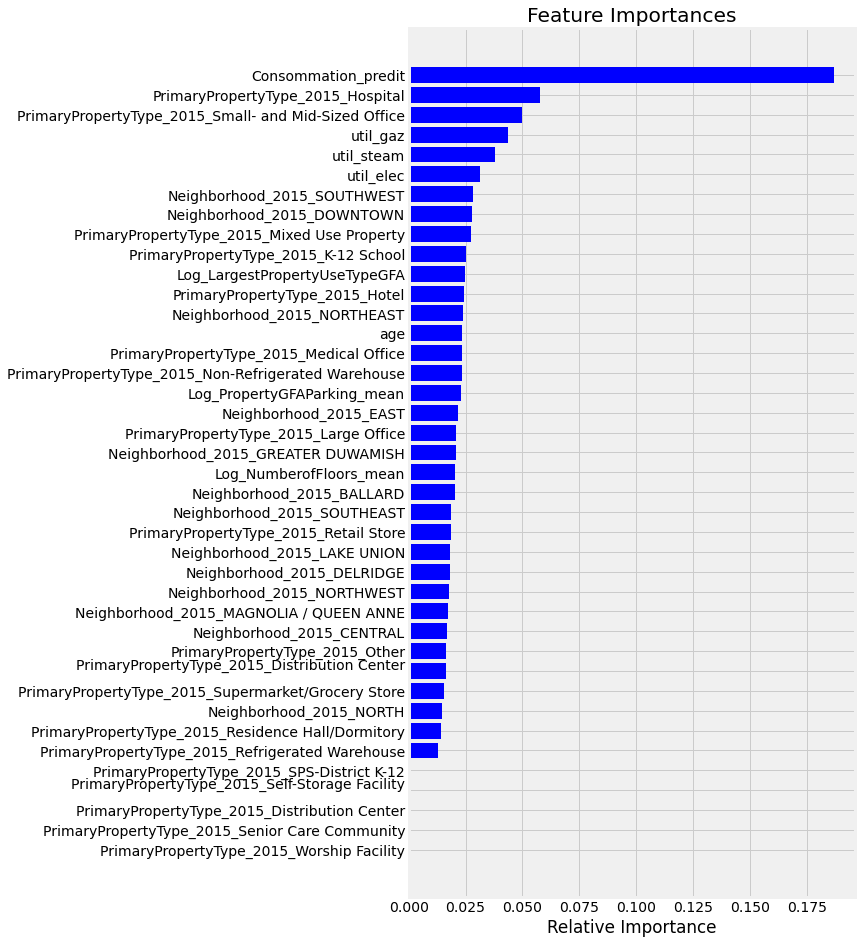

In [90]:
liste_variables=X_train.columns
importances = xgbr.feature_importances_
indices = np.argsort(importances)

# style du graphique 
plt.figure(figsize=(8,16))
plt.style.use('fivethirtyeight')
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.savefig('P4_02_02_feature_importance.jpg')
plt.xlabel('Relative Importance')